## Biblioteca importadas

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [2]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [3]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [4]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [5]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [6]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [7]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [8]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [9]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)

#### Inflação do turismo no Brasil

In [10]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [11]:
filename = r'C:Dados macros\pib_real.xlsx'
pib = pd.read_excel(filename)

## Analise exploratoria

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [12]:
principal =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

#### Correlação entre os dados pré selecionados 

In [13]:
principal = principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.825633,0.537493,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.825633,1.000000,0.747097,0.757172,0.089808,-0.283610,0.954258,0.963111,0.898470
Passageiros internacionais,0.537493,0.747097,1.000000,0.769081,-0.233850,-0.354779,0.718224,0.747865,0.591033
Preço,0.498046,0.757172,0.769081,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.089808,-0.233850,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.283610,-0.354779,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.954258,0.718224,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.963111,0.747865,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.898470,0.591033,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


#### Análise grafica

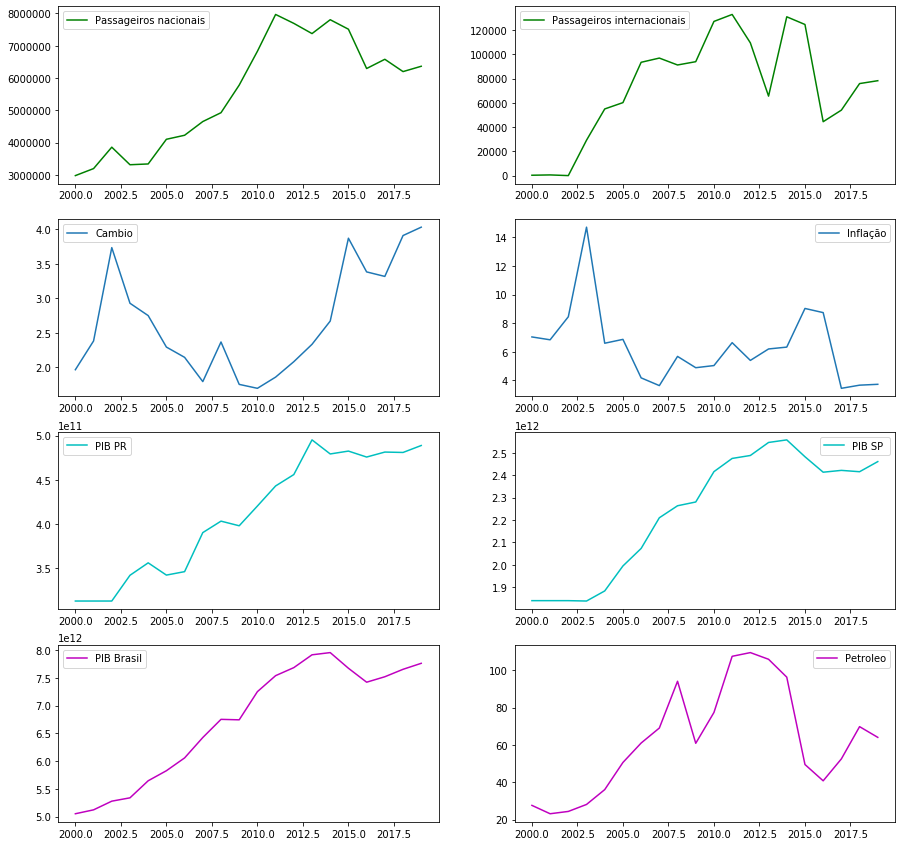

In [14]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [15]:
principal =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [16]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL TO"],axis=1).corr()


,Ano,Passageiros,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL PR
Ano,1.000000,0.965459,0.856124,0.498046,0.462911,-0.379601,0.934155,0.898730,0.963626
Passageiros,0.965459,1.000000,0.927720,0.477749,0.490011,-0.329348,0.906031,0.866309,0.940676
Passageiros internacionais,0.856124,0.927720,1.000000,0.386478,0.556759,-0.238665,0.776142,0.713907,0.825925
Preço,0.498046,0.477749,0.386478,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.617865
dolar,0.462911,0.490011,0.556759,-0.336762,1.000000,0.166638,0.202944,0.108461,0.341305
inflacao,-0.379601,-0.329348,-0.238665,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.311484
PIB REAL BRASIL,0.934155,0.906031,0.776142,0.739618,0.202944,-0.388362,1.000000,0.991895,0.975378
PIB REAL SP,0.898730,0.866309,0.713907,0.768696,0.108461,-0.408767,0.991895,1.000000,0.951621
PIB REAL PR,0.963626,0.940676,0.825925,0.617865,0.341305,-0.311484,0.975378,0.951621,1.000000


##### Análise grafica

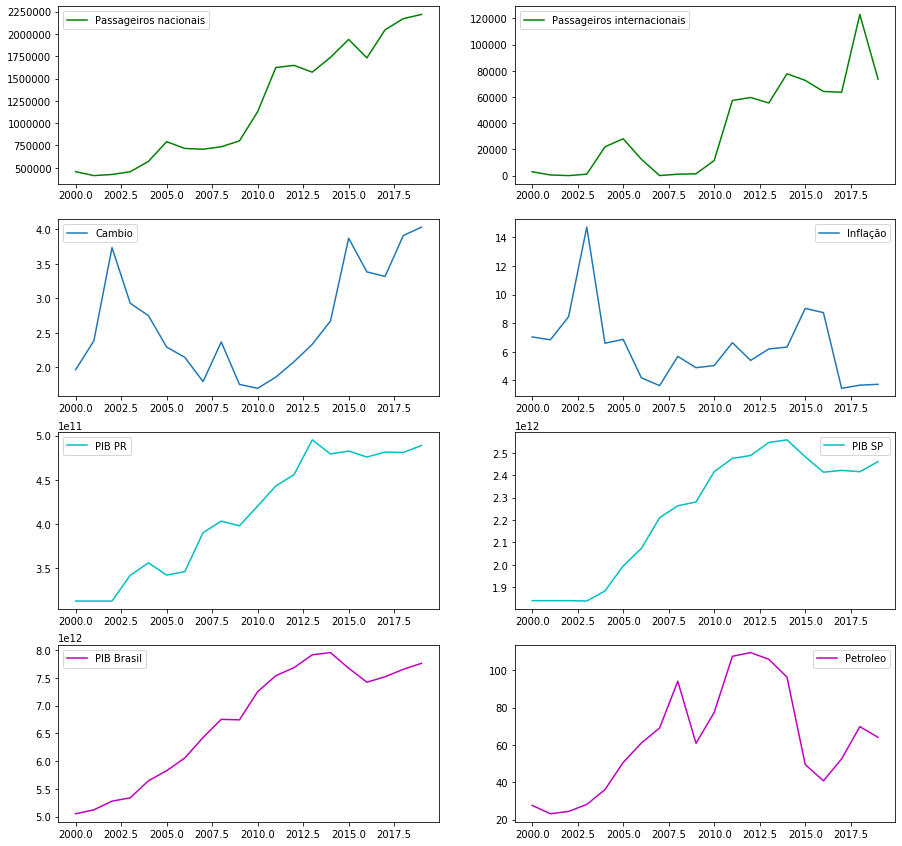

In [17]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [18]:
principal =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [19]:
principal= principal.loc[principal["Ano"]<2020]

principal.drop(["PIB REAL MA", "PIB REAL PR","PIB REAL TO"],axis=1).corr()

,Ano,Passageiros,Passageiros internacionais,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL SC
Ano,1.000000,0.874199,0.440303,0.498046,0.462911,-0.379601,0.934155,0.898730,0.964981
Passageiros,0.874199,1.000000,0.499191,0.326950,0.522662,-0.296078,0.786511,0.749122,0.854746
Passageiros internacionais,0.440303,0.499191,1.000000,0.046403,0.482121,-0.332472,0.259354,0.193522,0.331311
Preço,0.498046,0.326950,0.046403,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.663694
dolar,0.462911,0.522662,0.482121,-0.336762,1.000000,0.166638,0.202944,0.108461,0.304972
inflacao,-0.379601,-0.296078,-0.332472,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.389976
PIB REAL BRASIL,0.934155,0.786511,0.259354,0.739618,0.202944,-0.388362,1.000000,0.991895,0.988461
PIB REAL SP,0.898730,0.749122,0.193522,0.768696,0.108461,-0.408767,0.991895,1.000000,0.971014
PIB REAL SC,0.964981,0.854746,0.331311,0.663694,0.304972,-0.389976,0.988461,0.971014,1.000000


##### Análise grafica

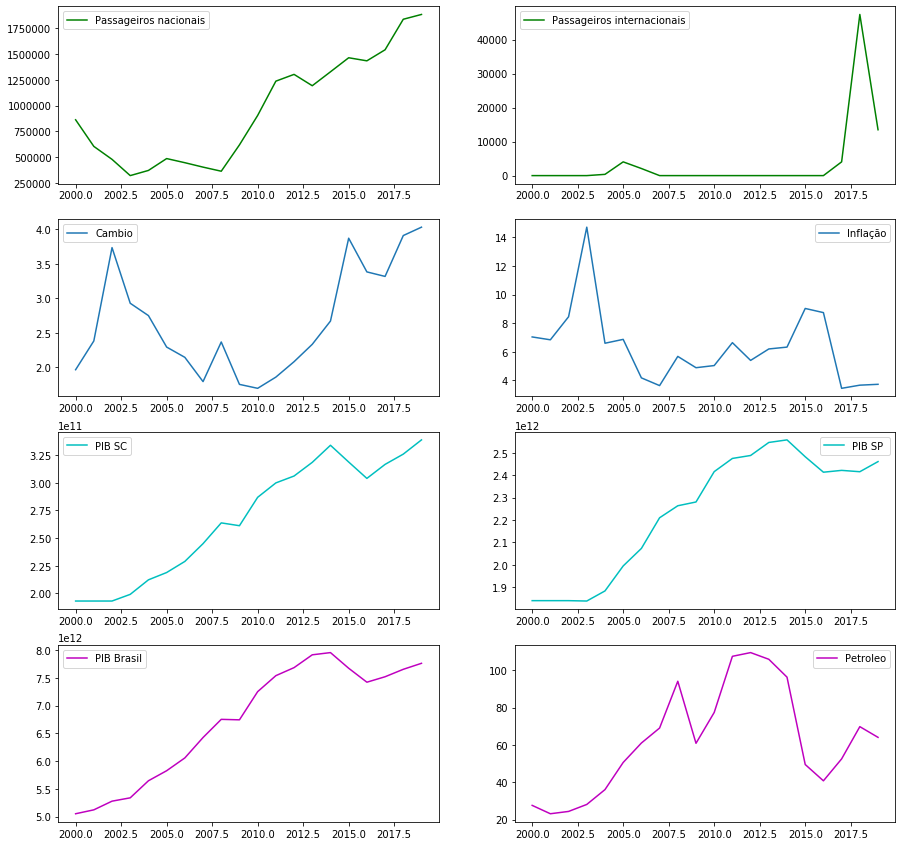

In [20]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [21]:
principal =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [22]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL MA", "PIB REAL SC","PIB REAL PR"],axis=1).corr()

,Ano,Passageiros,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL TO
Ano,1.000000,0.942935,0.498046,0.462911,-0.379601,0.934155,0.898730,0.986580
Passageiros,0.942935,1.000000,0.546518,0.365772,-0.344995,0.937534,0.915110,0.963334
Preço,0.498046,0.546518,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.506281
dolar,0.462911,0.365772,-0.336762,1.000000,0.166638,0.202944,0.108461,0.443775
inflacao,-0.379601,-0.344995,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.331505
PIB REAL BRASIL,0.934155,0.937534,0.739618,0.202944,-0.388362,1.000000,0.991895,0.943447
PIB REAL SP,0.898730,0.915110,0.768696,0.108461,-0.408767,0.991895,1.000000,0.913279
PIB REAL TO,0.986580,0.963334,0.506281,0.443775,-0.331505,0.943447,0.913279,1.000000


##### Análise grafica

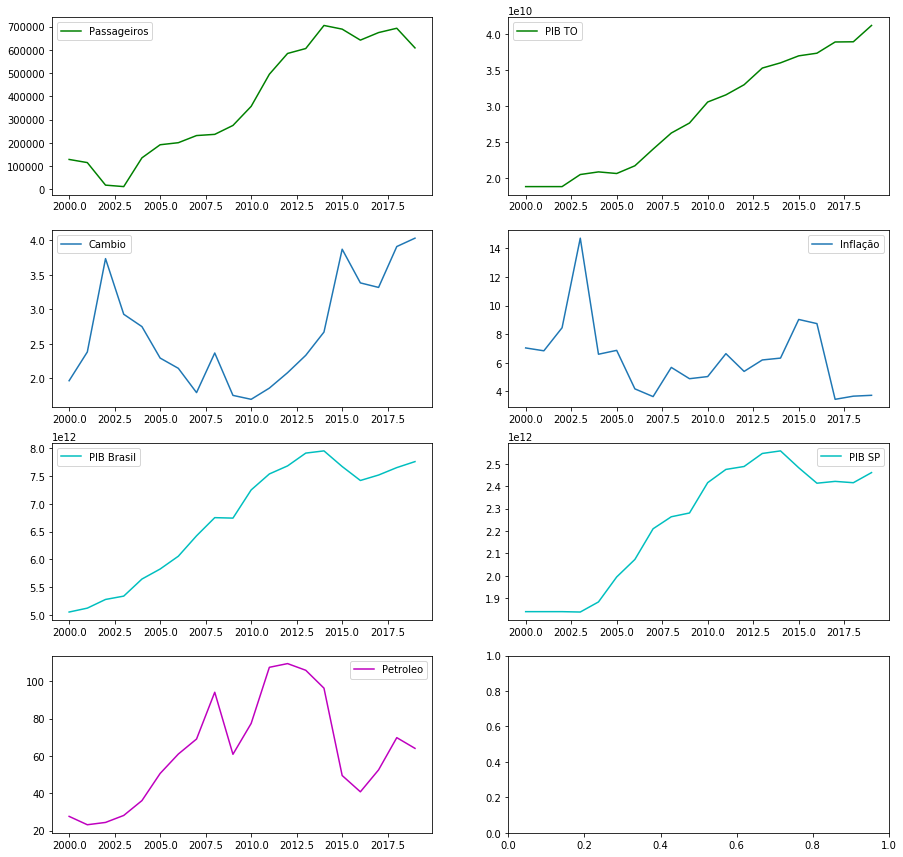

In [23]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()

## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [24]:
principal =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [25]:
principal= principal.loc[principal["Ano"]<2020]
principal.drop(["PIB REAL PR", "PIB REAL SC","PIB REAL TO"],axis=1).corr()

,Ano,Passageiros,Preço,dolar,inflacao,PIB REAL BRASIL,PIB REAL SP,PIB REAL MA
Ano,1.000000,0.963178,0.498046,0.462911,-0.379601,0.934155,0.898730,0.971895
Passageiros,0.963178,1.000000,0.474653,0.495322,-0.325744,0.902445,0.861388,0.942201
Preço,0.498046,0.474653,1.000000,-0.336762,-0.422720,0.739618,0.768696,0.629463
dolar,0.462911,0.495322,-0.336762,1.000000,0.166638,0.202944,0.108461,0.327593
inflacao,-0.379601,-0.325744,-0.422720,0.166638,1.000000,-0.388362,-0.408767,-0.374915
PIB REAL BRASIL,0.934155,0.902445,0.739618,0.202944,-0.388362,1.000000,0.991895,0.976990
PIB REAL SP,0.898730,0.861388,0.768696,0.108461,-0.408767,0.991895,1.000000,0.955459
PIB REAL MA,0.971895,0.942201,0.629463,0.327593,-0.374915,0.976990,0.955459,1.000000


##### Análise grafica

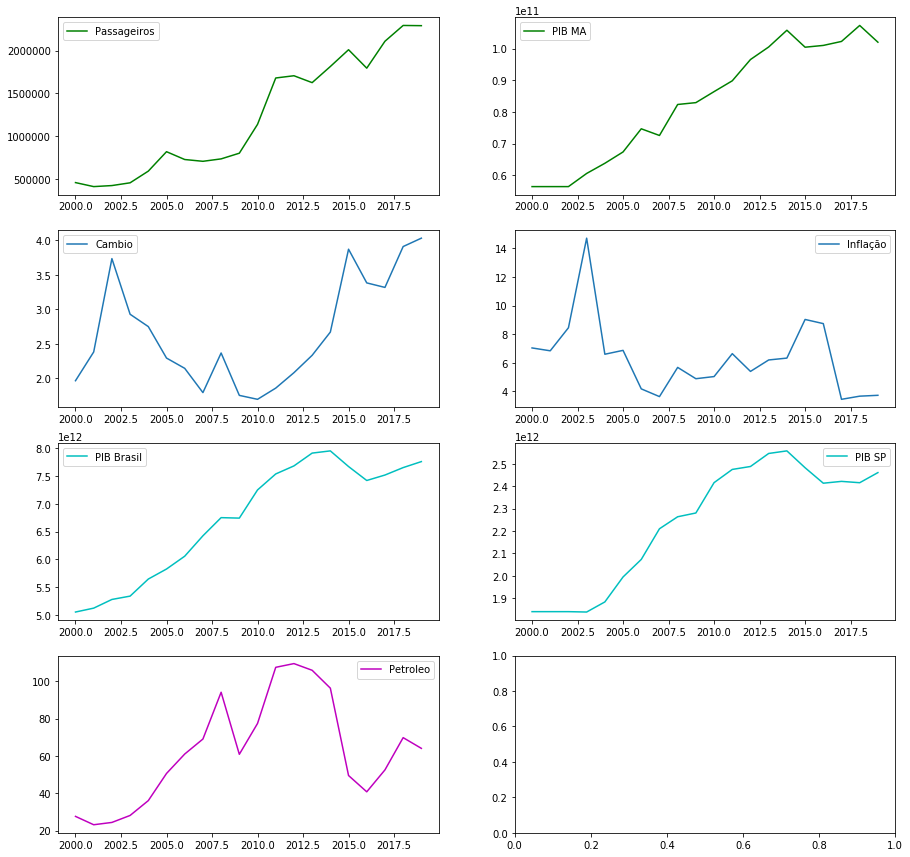

In [26]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal["Ano"], principal["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

ax[0,1].plot(principal["Ano"], principal["PIB REAL MA"],"g", label='PIB MA')
ax[0,1].legend()

ax[1,0].plot(principal["Ano"], principal["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal["Ano"], principal["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal["Ano"], principal["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
ax[2,1].legend()

ax[3,0].plot(principal["Ano"], principal["Preço"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()

## Comparação de passageiros nos aeroportos analisados

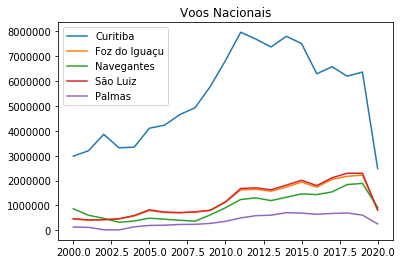

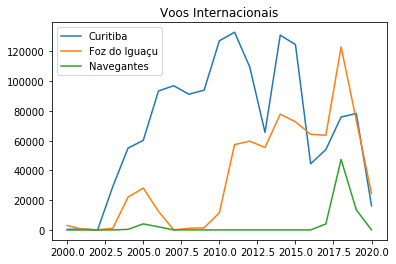

In [52]:
plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
plt.legend()
#
plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
plt.legend()
#
plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
plt.legend()
#
plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
plt.legend()

plt.title("Voos Nacionais")
plt.show()




plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
plt.legend()

plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
plt.legend()

plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
plt.legend()

plt.title("Voos Internacionais")
plt.show()